# **Disaster Message Classification and Response System**




Project title: **Learning from Disaster Response Messages**

Hugging Face link: https://huggingface.co/datasets/community-datasets/disaster_response_messages

Columns that we are trying to predict for **Multi-Label Binary Classification**:
-  'aid_related',
- 'water'
- 'food',
- 'shelter'

We can remove or add to this list if needed.

In [3]:
# For configuration and Backend purposes:
import sklearn
import numpy
import scipy

print("scikit-learn =", sklearn.__version__)
print("numpy =", numpy.__version__)
print("scipy =", scipy.__version__)

scikit-learn = 1.6.1
numpy = 2.0.2
scipy = 1.16.3


In [ ]:
from datasets import load_dataset

# Load in Huggingface Dataset
dataset = load_dataset("community-datasets/disaster_response_messages")
print(type(dataset))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/379k [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/388k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21046 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2629 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2573 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
# Convert Dataset to Dataframe
train_df = dataset["train"].to_pandas()
val_df   = dataset["validation"].to_pandas()
test_df  = dataset["test"].to_pandas()

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print('Training df cols', train_df.columns)
print('Training df shape', train_df.shape)
print('Validation df shape', val_df.shape)
print('Testing df shape', test_df.shape)

Training df cols Index(['split', 'message', 'original', 'genre', 'related', 'PII', 'request',
       'offer', 'aid_related', 'medical_help', 'medical_products',
       'search_and_rescue', 'security', 'military', 'child_alone', 'water',
       'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees',
       'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'],
      dtype='object')
Training df shape (21046, 41)
Validation df shape (2573, 41)
Testing df shape (2629, 41)


In [ ]:
print('Training df head')
train_df.head()

Training df head


,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
def count_related(df, col):
  df_col = df[col]
  count_related = df_col.sum() # cound the 1s
  return count_related

print('Number of messages that are related to a specific disaster')
print(f'Aid related: {count_related(train_df, 'aid_related')}')
print(f'Search and Rescue related: {count_related(train_df, 'search_and_rescue')}')
print(f'Water related: {count_related(train_df, 'water')}')
print(f'Food related: {count_related(train_df, 'food')}')
print(f'Shelter related: {count_related(train_df, 'shelter')}')

Number of messages that are related to a specific disaster
Aid related: 8685
Search and Rescue related: 620
Water related: 1321
Food related: 2329
Shelter related: 1878


In [ ]:
# Example of data point (included in report)
train_df.iloc[100]

,100
split,train
message,We live in La Pleine. Since Tuesday we've been...
original,"NOU ABITE LAPLN, DEPI MADI A SE NAN LARI NAP D..."
genre,direct
related,1
PII,0
request,1
offer,0
aid_related,1
medical_help,0


In [ ]:
# Example of data point's message (included in report)
train_df.iloc[100]['message']

"We live in La Pleine. Since Tuesday we've been sleeping on the street. Hunger is killing us."

# Data Preprocessing

Preprocessing Techniques:
- Count Vectorizer
- TF-IDF Vectorizer
- BERT Embeddings

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import LatentDirichletAllocation

# columns to be predicted
cols = ['aid_related', 'water', 'food', 'shelter']

"""
  Return:
    X_train: sparse matrix
    X_test: sparse matrix
    X_val: sparse matrix
"""
def count_vectorizer(X_train, X_test, X_val, max_f):
  vectorizer = CountVectorizer(
      max_features=max_f,
      min_df=2
  )
  X_train = vectorizer.fit_transform(X_train)
  X_test = vectorizer.transform(X_test)
  X_val = vectorizer.transform(X_val)
  return X_train, X_test, X_val

def tfidf_vectorizer(X_train, X_test, X_val, max_f):
  vectorizer = TfidfVectorizer(
      max_features=max_f,
      min_df=2
  )
  X_train = vectorizer.fit_transform(X_train)
  X_test = vectorizer.transform(X_test)
  X_val = vectorizer.transform(X_val)
  return X_train, X_test, X_val

def bert_embeddings(X_train, X_test, X_val, model_name):
  bert_model = SentenceTransformer(model_name)
  X_train = list(X_train)
  X_test = list(X_test)
  X_val = list(X_val)

  X_train = bert_model.encode(X_train, batch_size=32, show_progress_bar=True)
  X_test = bert_model.encode(X_test, batch_size=32, show_progress_bar=True)
  X_val = bert_model.encode(X_val, batch_size=32, show_progress_bar=True)
  return X_train, X_test, X_val

def LDA_tfidf(X_train, X_test, X_val, max_f):
  # 1. Count Vectorize Splits
  count_vectorizer = CountVectorizer(
    max_features=max_f,
    max_df=0.95,
    min_df=5,
    stop_words="english"
  )
  X_train_count_vectors = count_vectorizer.fit_transform(X_train)
  X_test_count_vectors = count_vectorizer.transform(X_test)
  X_val_count_vectors = count_vectorizer.transform(X_val)

  # 2. Fit LDA on Split Vectors
  lda = LatentDirichletAllocation(
    n_components=200, # Higher end of topic generation for increased coverage
    learning_method="batch",
    random_state=42
  )
  X_train_LDA = lda.fit_transform(X_train_count_vectors)
  X_test_LDA = lda.transform(X_test_count_vectors)
  X_val_LDA = lda.transform(X_val_count_vectors)

  # 3. Apply tfidf to original split
  tfidf_vec = TfidfVectorizer(
    max_features=max_f,
    max_df=0.95,
    min_df=5,
    stop_words="english"
  )
  X_train_tfidf = tfidf_vec.fit_transform(X_train)
  X_test_tfidf = tfidf_vec.transform(X_test)
  X_val_tfidf = tfidf_vec.transform(X_val)

  # 4. Merge tfidf + LDA
  X_train_LDA_tfidf = np.hstack([X_train_tfidf.toarray(), X_train_LDA])
  X_test_LDA_tfidf = np.hstack([X_test_tfidf.toarray(), X_test_LDA])
  X_val_LDA_tfidf = np.hstack([X_val_tfidf.toarray(), X_val_LDA])

  return X_train_LDA_tfidf, X_test_LDA_tfidf, X_val_LDA_tfidf


"""
  This function will pre proces our DataFrame and return our X and y values
  We can choose to transform this text using:
    - Count Vectorizer
    - TF-IDF Vectorizer

  Returns:
    x: np.ndarray
    y: np.ndarray
"""
def preprocess(df_train, df_test, df_val, method, max_features=1000,
               model_name='all-MiniLM-L6-v2'):
  X_train = df_train['message'].fillna('') # English message
  X_test = df_test['message'].fillna('') # English message
  X_val = df_val['message'].fillna('') # English message

  if method == 'count_vectorizer':
    X_train, X_test, X_val = count_vectorizer(X_train, X_test, X_val, max_features)
  elif method == 'tfidf_vectorizer':
    X_train, X_test, X_val = tfidf_vectorizer(X_train, X_test, X_val, max_features)
  elif method == 'LDA_tfidf_vectorizer':
    X_train, X_test, X_val = LDA_tfidf(X_train, X_test, X_val, max_features)
  elif method == 'bert_embeddings':
    X_train, X_test, X_val = bert_embeddings(X_train, X_test, X_val, model_name)
  else:
    raise ValueError('Invalid method')

  y_train = df_train[cols].to_numpy() # Multi label
  y_test = df_test[cols].to_numpy() # Multi label
  y_val = df_val[cols].to_numpy() # Multi label

  return X_train, y_train, X_test, y_test, X_val, y_val

In [ ]:
# Count Vectorizer (max_features = 1000)
x_train_count_1k, y_train_count_1k, _, _, x_val_count_1k, y_val_count_1k = preprocess(
    train_df, test_df, val_df, 'count_vectorizer', 1000)
print(x_train_count_1k.shape)
print(x_val_count_1k.shape)

(21046, 1000)
(2573, 1000)


In [ ]:
# Count Vectorizer (max_features = 3000)
x_train_count_3k, y_train_count_3k, _, _, x_val_count_3k, y_val_count_3k = preprocess(
    train_df, test_df, val_df, 'count_vectorizer', 3000)
print(x_train_count_3k.shape)
print(x_val_count_3k.shape)

(21046, 3000)
(2573, 3000)


In [ ]:
# Count Vectorizer (max_features = 5000)
x_train_count_5k, y_train_count_5k, _, _, x_val_count_5k, y_val_count_5k = preprocess(
    train_df, test_df, val_df, 'count_vectorizer', 5000)
print(x_train_count_5k.shape)
print(x_val_count_5k.shape)

(21046, 5000)
(2573, 5000)


In [ ]:
# Tfdif Vectorizer (max_features = 1000)
x_train_tfidf_1k, y_train_tfidf_1k, _, _, x_val_tfidf_1k, y_val_tfidf_1k = preprocess(
    train_df, test_df, val_df, 'tfidf_vectorizer', 1000)
print(x_train_tfidf_1k.shape)
print(x_val_tfidf_1k.shape)

(21046, 1000)
(2573, 1000)


In [ ]:
# Tfdif Vectorizer (max_features = 3000)
x_train_tfidf_3k, y_train_tfidf_3k, _, _, x_val_tfidf_3k, y_val_tfidf_3k = preprocess(
    train_df, test_df, val_df, 'tfidf_vectorizer', 3000)
print(x_train_tfidf_3k.shape)
print(x_val_tfidf_3k.shape)

(21046, 3000)
(2573, 3000)


In [ ]:
# Tfdif Vectorizer (max_features = 5000)
x_train_tfidf_5k, y_train_tfidf_5k, _, _, x_val_tfidf_5k, y_val_tfidf_5k = preprocess(
    train_df, test_df, val_df, 'tfidf_vectorizer', 5000)
print(x_train_tfidf_5k.shape)
print(x_val_tfidf_5k.shape)

(21046, 5000)
(2573, 5000)


In [ ]:
# LDA + Tfdif Vectorizer (max_features = 1000)
x_train_LDA_tfidf_1k, y_train_LDA_tfidf_1k, _, _, x_val_LDA_tfidf_1k, y_val_LDA_tfidf_1k = preprocess(
    train_df, test_df, val_df, 'LDA_tfidf_vectorizer', 1000)
print(x_train_LDA_tfidf_1k.shape)
print(x_val_LDA_tfidf_1k.shape)

In [ ]:
# LDA + Tfdif Vectorizer (max_features = 3000)
x_train_LDA_tfidf_3k, y_train_LDA_tfidf_3k, _, _, x_val_LDA_tfidf_3k, y_val_LDA_tfidf_3k = preprocess(
    train_df, test_df, val_df, 'LDA_tfidf_vectorizer', 3000)
print(x_train_LDA_tfidf_3k.shape)
print(x_val_LDA_tfidf_3k.shape)

In [ ]:
# LDA + Tfdif Vectorizer (max_features = 5000)
x_train_LDA_tfidf_5k, y_train_LDA_tfidf_5k, _, _, x_val_LDA_tfidf_5k, y_val_LDA_tfidf_5k = preprocess(
    train_df, test_df, val_df, 'LDA_tfidf_vectorizer', 5000)
print(x_train_LDA_tfidf_5k.shape)
print(x_val_LDA_tfidf_5k.shape)

In [ ]:
# Bert embeddings all-MiniLM-L6-v2
model_name = 'all-MiniLM-L6-v2'
x_train_bert_1, y_train_bert_1, _, _, x_val_bert_1, y_val_bert_1 = preprocess(
    train_df, test_df, val_df, 'bert_embeddings', model_name=model_name)
print(x_train_bert_1.shape)
print(x_val_bert_1.shape)

In [ ]:
# Bert embeddings all-mpnet-base-v2
model_name = 'all-mpnet-base-v2'
x_train_bert_2, y_train_bert_2, _, _, x_val_bert_2, y_val_bert_2 = preprocess(
    train_df, test_df, val_df, 'bert_embeddings', model_name=model_name)
print(x_train_bert_2.shape)
print(x_val_bert_2.shape)

In [ ]:
# Bert embeddings BAAI/bge-large-en-v1.5
model_name = 'BAAI/bge-large-en-v1.5'
x_train_bert_3, y_train_bert_3, _, _, x_val_bert_3, y_val_bert_3 = preprocess(
    train_df, test_df, val_df, 'bert_embeddings', model_name=model_name)
print(x_train_bert_3.shape)
print(x_val_bert_3.shape)

# Model Implementation

## Machine Learning Algorithms

Models being tried our right now:
- Logistic Regression
- Linear SVM
- SGD Classifier
- Multinomial NB
- MLP Classifier (Neural Network)

List can be expanded easily (if needed). Note that algorithms that don't work well with BERT embeddings include:
- Multinomial NB: Doesn't support negative values

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, hamming_loss, confusion_matrix
import os

# Create directory where we are going to save models
os.makedirs("saved_models", exist_ok=True)

"""
Hyperparameter that helps with imbalanced data:
  class_weight='balanced'
"""
models = {
  "LogisticRegression": OneVsRestClassifier(
    LogisticRegression(
        class_weight='balanced',
        C=1.0,
        random_state=42,
        solver='lbfgs', # small-medium datasets
        max_iter=5000
    )
  ),

  "LinearSVM": OneVsRestClassifier(
    LinearSVC(
        class_weight='balanced',
        C=1.0,
        random_state=42,
        dual=True, # n_samples > n_features
        max_iter=5000
    )
  ),

  "SGDClassifier": OneVsRestClassifier(
    SGDClassifier(
        class_weight='balanced',
        random_state=42,
        max_iter=5000
    )
  ),

  "MultinomialNB": OneVsRestClassifier(
    MultinomialNB(
        alpha=1.0,
        fit_prior=True
    )
  ),
  "NeuralNetwork": OneVsRestClassifier(
    MLPClassifier(
      hidden_layer_sizes=(512, 256, 128),
      activation='relu',
      solver='adam',
      learning_rate_init=0.001,
      batch_size=256,
      max_iter=20,
      shuffle=True,
      random_state=42,
      verbose=False
    )
  )
}

In [ ]:
"""
Give a model, train it, and evaluate it.
Store model pk file.
"""
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name,
                   method_name):
  num_labels = len(cols)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  for label_idx, estimator in enumerate(model.estimators_):
    file_name = f"saved_models/{model_name}_{method_name}_{label_idx}.pkl"
    joblib.dump(estimator, file_name)

  macro_f1 = f1_score(y_val, y_pred, average='macro')
  micro_f1 = f1_score(y_val, y_pred, average='micro')
  hamming_loss_val = hamming_loss(y_val, y_pred)

  print(f"\n***********      {model_name}       ****************")
  print(f"Macro F1: {macro_f1:.4f}")
  print(f"Micro F1: {micro_f1:.4f}")
  print(f"Hamming Loss: {hamming_loss_val:.4f}")

  precision, recall, f1, support = precision_recall_fscore_support(
      y_val, y_pred, average=None
  )

  # Professor asked for confusion matrices
  conf_matrices = []
  for i in range(num_labels):
    cm = confusion_matrix(y_val[:, i], y_pred[:, i])
    conf_matrices.append(cm)

  print(f"{'Label':<20} {'F1':<8} {'Precision':<12} {'Recall':<10} {'Support':<10}")
  print("-" * 65)
  for i, col in enumerate(cols):
    print(f"{col:<20} {f1[i]:<8.3f} {precision[i]:<12.3f} {recall[i]:<10.3f} {int(support[i]):<10}")

  return {
      'model': model_name,
      'macro_f1': macro_f1,
      'micro_f1': micro_f1,
      'per_label_f1': f1,
      'per_label_precision': precision,
      'per_label_recall': recall,
      'per_label_support': support,
      'method': method_name,
      'hamming_loss': hamming_loss_val,
      'conf_matrices': conf_matrices
  }

def evaluate_all_models(all_models, X_train, y_train, X_val, y_val, method,
                        using_bert=False):
  print('Evaluating models...')
  results = []
  for name, model in all_models.items():
    if using_bert and (name == 'MultinomialNB' or name == 'NeuralNetwork'): # Bert embeddings don't work with Multinomial NB or MLP
      print(f'{name} does not work with BERT embeddings')
      continue
    result = evaluate_model(model, X_train, y_train, X_val, y_val, name, method)
    results.append(result)
  return results

In [ ]:
def run_benchmark():
  print('Running benchmark...')

  all_results = []
  print('\nCOUNT VECTORIZER 1000')
  curr_method = 'bow_1000'
  results = evaluate_all_models(models, x_train_count_1k, y_train_count_1k,
                                x_val_count_1k, y_val_count_1k, curr_method)
  all_results.extend(results)

  print('\nCOUNT VECTORIZER 3000')
  curr_method = 'bow_3000'
  results = evaluate_all_models(models, x_train_count_3k, y_train_count_3k,
                                x_val_count_3k, y_val_count_3k, curr_method)
  all_results.extend(results)

  print('\nCOUNT VECTORIZER 5000')
  curr_method = 'bow_5000'
  results = evaluate_all_models(models, x_train_count_5k, y_train_count_5k,
                                x_val_count_5k, y_val_count_5k, curr_method)
  all_results.extend(results)

  print('\nTF-IDF 1000')
  curr_method = 'tfidf_1000'
  results = evaluate_all_models(models, x_train_tfidf_1k, y_train_tfidf_1k,
                                x_val_tfidf_1k, y_val_tfidf_1k, curr_method)
  all_results.extend(results)

  print('\nTF-IDF 3000')
  curr_method = 'tfidf_3000'
  results = evaluate_all_models(models, x_train_tfidf_3k, y_train_tfidf_3k,
                                x_val_tfidf_3k, y_val_tfidf_3k, curr_method)
  all_results.extend(results)

  print('\nTF-IDF 5000')
  curr_method = 'tfidf_5000'
  results = evaluate_all_models(models, x_train_tfidf_5k, y_train_tfidf_5k,
                                x_val_tfidf_5k, y_val_tfidf_5k, curr_method)
  all_results.extend(results)

  print('\nLDA + TF-IDF 1000')
  curr_method = 'LDA + tfidf_1000'
  results = evaluate_all_models(models, x_train_LDA_tfidf_1k, y_train_LDA_tfidf_1k,
                                x_val_LDA_tfidf_1k, y_val_LDA_tfidf_1k, curr_method)
  all_results.extend(results)

  print('\nLDA + TF-IDF 3000')
  curr_method = 'LDA + tfidf_3000'
  results = evaluate_all_models(models, x_train_LDA_tfidf_3k, y_train_LDA_tfidf_3k,
                                x_val_LDA_tfidf_3k, y_val_LDA_tfidf_3k, curr_method)
  all_results.extend(results)

  print('\nLDA + TF-IDF 5000')
  curr_method = 'LDA + tfidf_5000'
  results = evaluate_all_models(models, x_train_LDA_tfidf_5k, y_train_LDA_tfidf_5k,
                                x_val_LDA_tfidf_5k, y_val_LDA_tfidf_5k, curr_method)
  all_results.extend(results)

  print('\nBERT MiniLM')
  curr_method = 'bert_minilm'
  results = evaluate_all_models(models, x_train_bert_1, y_train_bert_1,
                                x_val_bert_1, y_val_bert_1, curr_method, using_bert=True)
  all_results.extend(results)

  print('\nBERT MpNet')
  curr_method = 'bert_mpnet'
  results = evaluate_all_models(models, x_train_bert_2, y_train_bert_2,
                                x_val_bert_2, y_val_bert_2, curr_method, using_bert=True)
  all_results.extend(results)

  print('\nBERT BAAI')
  curr_method = 'bert_baai'
  results = evaluate_all_models(models, x_train_bert_3, y_train_bert_3,
                                x_val_bert_3, y_val_bert_3, curr_method, using_bert=True)
  all_results.extend(results)

  return all_results

## Evaluation

Run benchmark and save results to csv file.

Methods tried:
- Count Vectorizer (1000, 3000, 5000)
- TF-IDF Vectorizer (1000, 3000, 5000)
- BERT Embeddings

ML algorithms tried:
- Logistic Regression
- Linear SVM
- SGD Classifier
- Multinomial NB
- MLP Classifier (Neural Network)

In [ ]:
# Run benchmark and store results
all_results = run_benchmark()
results_df = pd.DataFrame(all_results)
results_df.to_csv('curr_results.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gets best -> Macro F1
def plot_best_per_method(results_df):
  # Find best model per method (highest macro_f1)
  best_per_method = results_df.loc[results_df.groupby('method')['macro_f1'].idxmax()]

  best_per_method = best_per_method.sort_values('macro_f1', ascending=False)

  plt.figure(figsize=(10, 6))

  methods = best_per_method['method']
  macro_f1_scores = best_per_method['macro_f1']
  models = best_per_method['model']

  bars = plt.bar(range(len(methods)), macro_f1_scores, color='steelblue', alpha=0.8)

  # Highlight the overall best
  best_idx = macro_f1_scores.idxmax()
  best_position = list(best_per_method.index).index(best_idx)
  bars[best_position].set_color('green')
  bars[best_position].set_label('Overall Best')

  plt.xlabel('Method', fontsize=12)
  plt.ylabel('Macro F1 Score', fontsize=12)
  plt.title('Best Model Performance per Method (Macro F1)', fontsize=14, fontweight='bold')
  plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
  plt.ylim(0, 1.0)
  plt.legend()
  plt.grid(axis='y', alpha=0.3)

  # Add labels and model names
  for i, (score, model) in enumerate(zip(macro_f1_scores, models)):
      plt.text(i, score + 0.02, f'{score:.3f}\n({model})',
              ha='center', fontsize=9, va='bottom')

  plt.tight_layout()
  plt.savefig('best_per_method_comparison.png', dpi=300, bbox_inches='tight')
  plt.show()

  # Print summary
  print("\n" + "=" * 70)
  print("Best Model Per Method Summary")
  print("="*70)
  for _, row in best_per_method.iterrows():
      print(f"{row['method']:<25} | {row['model']:<20} | Macro F1: {row['macro_f1']:.4f}")

  # Print overall best
  overall_best = best_per_method.loc[best_idx]
  print("\n" + "="*70)
  print(f"OVERALL BEST: {overall_best['model']} with {overall_best['method']}")
  print(f"Macro F1: {overall_best['macro_f1']:.4f}")
  print("="*70)

  return best_per_method

"""
Plot best ML alg per-each method
"""
results_df = pd.read_csv('results.csv')
plot_best_per_method(results_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gets best -> Hamming Loss
def plot_best_per_method(results_df):
    # Find best model per method (lowest hamming loss)
    best_per_method = results_df.loc[results_df.groupby('method')['hamming_loss'].idxmin()]

    # Sort by hamming_loss (ascending)
    best_per_method = best_per_method.sort_values('hamming_loss', ascending=True)

    plt.figure(figsize=(10, 6))

    methods = best_per_method['method']
    hamming_scores = best_per_method['hamming_loss']
    models = best_per_method['model']

    # Create bars
    bars = plt.bar(range(len(methods)), hamming_scores, color='steelblue', alpha=0.8)

    # Highlight overall best (lowest loss)
    best_idx = hamming_scores.idxmin()
    best_position = list(best_per_method.index).index(best_idx)
    bars[best_position].set_color('green')
    bars[best_position].set_label('Overall Best')

    # Formatting
    plt.xlabel('Method', fontsize=12)
    plt.ylabel('Hamming Loss', fontsize=12)
    plt.title('Best Model Performance per Method (Hamming Loss)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylim(0, max(hamming_scores) + 0.05)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, (score, model) in enumerate(zip(hamming_scores, models)):
        plt.text(i, score + 0.01, f'{score:.3f}\n({model})',
                 ha='center', fontsize=9, va='bottom')

    plt.tight_layout()
    plt.savefig('best_per_method_hamming.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Summary printout
    print("\n" + "="*70)
    print("Best Model Per Method Summary (Hamming Loss)")
    print("="*70)
    for _, row in best_per_method.iterrows():
        print(f"{row['method']:<25} | {row['model']:<20} | Hamming Loss: {row['hamming_loss']:.4f}")

    # Print overall best
    overall_best = best_per_method.loc[best_idx]
    print("\n" + "="*70)
    print(f"OVERALL BEST: {overall_best['model']} with {overall_best['method']}")
    print(f"Hamming Loss: {overall_best['hamming_loss']:.4f}")
    print("="*70)

    return best_per_method


# Load and plot
results_df = pd.read_csv('results.csv')
plot_best_per_method(results_df)


In [ ]:
"""
Choose best feature engineering approach per each method:
- Count Vectorizer (Bag of Words) 1000, 3000, 5000
- TF-IDF Vectorizer 1000, 3000, 5000
- BERT Embeddings all-MiniLM-L6-v2, all-mpnet-base-v2, BAAI/bge-large-en-v1.5
"""
def get_best_method(results_df):
  best_per_method = results_df.loc[results_df.groupby('method')['macro_f1'].idxmax()]
  best_per_method = best_per_method.sort_values('macro_f1', ascending=False)
  return best_per_method.iloc[0]['method']

best_method = get_best_method(results_df)
print(best_method)

In [ ]:
"""
Save best vectorizer
"""
X_train = train_df['message'].fillna('') # English message
vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2
)
print("Saving TF-IDF Vectorizer...")
os.makedirs("vectorizer", exist_ok=True)
vectorizer.fit(X_train)
joblib.dump(vectorizer, "vectorizer/final_vectorizer.pkl")

In [ ]:
"""
Save best ML models to be deployed in our Backend API

Best for classical machine learning approaches:
- SGD Classifier with TFIDF-5000
"""

import joblib
import os
import numpy as np
import ast

def parse_numpy_array_string(s):
    if isinstance(s, list) or isinstance(s, np.ndarray):
        return np.array(s)

    s = s.strip().strip("[]").replace("\n", " ")
    parts = s.split()
    return np.array([float(x) for x in parts])

def select_best_models_per_label(results_df, best_method, label_count=4):
    df = results_df[results_df["method"] == best_method].copy()

    df["per_label_f1"] = df["per_label_f1"].apply(parse_numpy_array_string)

    print(f"\nBest method: {best_method}")

    best_for_label = [None] * label_count
    best_scores = [-1] * label_count

    os.makedirs("final_models", exist_ok=True)

    for label_idx in range(label_count):
        print(f"\n*************** Label {label_idx} **************")

        ranking = []
        for row in df.itertuples():
            model_name = row.model
            f1_vector = row.per_label_f1

            score = f1_vector[label_idx]
            ranking.append((model_name, score))
        ranking_sorted = sorted(ranking, key=lambda x: x[1], reverse=True)

        print("Ranking:")
        for model_name, score in ranking_sorted:
            print(f"{model_name:<25} F1 = {score:.4f}")

        best_model_name, best_f1 = ranking_sorted[0]
        best_for_label[label_idx] = best_model_name
        best_scores[label_idx] = best_f1

        print(f"\nBest for label {label_idx}: {best_model_name} (F1 = {best_f1:.4f})")

        src_path = f"saved_models/{best_model_name}_{best_method}_{label_idx}.pkl"
        dst_path = f"final_models/{best_model_name}_{best_method}_{label_idx}.pkl"

        if os.path.exists(src_path):
            estimator = joblib.load(src_path)
            joblib.dump(estimator, dst_path)
            print(f"Saved -> {dst_path}")
        else:
            print(f"Missing model file: {src_path}")

    return best_for_label

select_best_models_per_label(results_df, 'tfidf_5000')

# Fine-Tuned Bert

Moving past classical Machine Learning algorithms to test a potential better solution with a Transformer-based architecture.

In [ ]:
cols = ['aid_related', 'water', 'food', 'shelter']

In [ ]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df[['message'] + cols])
val_ds   = Dataset.from_pandas(val_df[['message'] + cols])

In [ ]:
!pip install transformers[torch] accelerate -U --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 140.8 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import f1_score, accuracy_score, hamming_loss
from datasets import Dataset

model_ckpt = "bert-base-uncased"
target_cols = ['aid_related', 'water', 'food', 'shelter']
batch_size = 8
epochs = 3
learning_rate = 2e-5

# Prepare data
# We need to combine the labels into a single list [0, 1, 0, 1] for each row
def create_hf_dataset(df, tokenizer):
    # Ensure messages are strings
    df['message'] = df['message'].astype(str)

    # Create a 'labels' column that is a list of floats for each target
    # It's important that labels are float type for BCEWithLogitsLoss
    df['labels'] = df[target_cols].values.astype(float).tolist()

    # Convert to Hugging Face Dataset
    dataset = Dataset.from_pandas(df[['message', 'labels']])

    # Tokenization function
    def tokenize_function(examples):
        return tokenizer(
            examples["message"],
            padding="max_length",
            truncation=True,
            max_length=128
        )

    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    # Set format for PyTorch, explicitly setting labels to float32
    # The 'transform' argument is removed as it's causing the TypeError
    tokenized_datasets.set_format(
        type="torch",
        columns=['input_ids', 'attention_mask', 'labels'],
        output_all_columns=True
    )
    return tokenized_datasets

print("Preparing datasets for BERT fine-tuning...")
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Use your existing dataframes
train_dataset = create_hf_dataset(train_df, tokenizer)
val_dataset = create_hf_dataset(val_df, tokenizer)
test_dataset = create_hf_dataset(test_df, tokenizer)

print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}")

# 3. Define Metrics for Multi-Label Evaluation
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Apply sigmoid to get probabilities, then threshold at 0.5
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[probs >= 0.5] = 1

    # Calculate metrics
    f1_micro = f1_score(labels, y_pred, average='micro')
    f1_macro = f1_score(labels, y_pred, average='macro')
    accuracy = accuracy_score(labels, y_pred)
    hl = hamming_loss(labels, y_pred)

    return {
        'f1_micro': f1_micro,
        'f1_macro': f1_macro,
        'accuracy': accuracy,
        'hamming_loss': hl
    }

# 4. Load Model
# problem_type="multi_label_classification" is crucial here!
model = AutoModelForSequenceClassification.from_pretrained(
    model_ckpt,
    num_labels=len(target_cols),
    problem_type="multi_label_classification"
)

# 5. Training Arguments
args = TrainingArguments(
    output_dir="bert_finetuned_disaster",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    report_to="none"
)

# 6. Initialize Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 7. Train!
print("Starting BERT Fine-Tuning...")
trainer.train()

Preparing datasets for BERT fine-tuning...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/21046 [00:00<?, ? examples/s]

Map:   0%|          | 0/2573 [00:00<?, ? examples/s]

Map:   0%|          | 0/2629 [00:00<?, ? examples/s]

Train size: 21046, Val size: 2573


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-6293619.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Starting BERT Fine-Tuning...


Epoch,Training Loss,Validation Loss,F1 Micro,F1 Macro,Accuracy,Hamming Loss,Runtime,Samples Per Second,Steps Per Second
1,0.199700,0.204520,0.772979,0.764339,0.753595,0.079674,5.852000,439.680000,55.024000
2,0.164100,0.214834,0.761337,0.755468,0.760979,0.077730,5.884400,437.261000,54.721000
3,0.111600,0.237093,0.766068,0.759845,0.757482,0.078508,5.825600,441.674000,55.274000


TrainOutput(global_step=7893, training_loss=0.16738888605094357, metrics={'train_runtime': 432.1156, 'train_samples_per_second': 146.114, 'train_steps_per_second': 18.266, 'total_flos': 4153151030925312.0, 'train_loss': 0.16738888605094357, 'epoch': 3.0})

In [ ]:
print("Evaluating BERT on Test Set...")
results = trainer.evaluate(val_dataset)

print(f"Macro F1 Score: {results['eval_f1_macro']:.4f}")
print(f"Micro F1 Score: {results['eval_f1_micro']:.4f}")
print(f"Accuracy:       {results['eval_accuracy']:.4f}")
print(f"Hamming Loss:   {results['eval_hamming_loss']:.4f}")
print("="*40)

Evaluating BERT on Test Set...


Macro F1 Score: 0.7643
Micro F1 Score: 0.7730
Accuracy:       0.7536
Hamming Loss:   0.0797


# Retrieval-Augmented Generation (RAG)

Working a RAG system as a proof of concept to show how the workflow would be done from Classification to an actual response system.

In [ ]:
from datasets import load_dataset

# Load in Huggingface Dataset
dataset = load_dataset("community-datasets/disaster_response_messages")
print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
# Convert Dataset to Dataframe
train_df = dataset["train"].to_pandas()
val_df   = dataset["validation"].to_pandas()
test_df  = dataset["test"].to_pandas()

In [ ]:
!pip install faiss-gpu-cu12 accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 42.0 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

# 1. Prepare the documents (using your existing train_df)
# We filter out non-string messages just in case
disaster_messages = [str(msg) for msg in train_df['message'].dropna().tolist()]

print(f"Total messages to index: {len(disaster_messages)}")

# 2. Load Embedding Model
rag_embedder = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Create FAISS Index
def create_faiss_index(documents, encoder_model):
    print("Encoding documents... this may take a moment.")
    # Encode the documents into vectors
    document_vectors = encoder_model.encode(documents, show_progress_bar=True)

    # Create a FAISS index (L2 Distance)
    dimension = document_vectors.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(document_vectors)

    print(f"Indexed {index.ntotal} documents.")
    return index

# Build the index
faiss_index = create_faiss_index(disaster_messages, rag_embedder)
stored_docs = disaster_messages

Total messages to index: 21046


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding documents... this may take a moment.


Batches:   0%|          | 0/658 [00:00<?, ?it/s]

Indexed 21046 documents.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load Model and Tokenizer
model_id = "microsoft/Phi-3.5-mini-instruct"

print("Loading LLM...")
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
llm_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype="auto",
    device_map="auto",
    trust_remote_code=True
)
llm_model.eval()
print("LLM Loaded Successfully.")

Loading LLM...


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

LLM Loaded Successfully.


In [ ]:
def retrieve_context(query, index, documents, encoder, k=5):
    """Retrieves top k similar messages from the dataset"""
    query_vec = encoder.encode([query])
    distances, indices = index.search(query_vec, k)

    # Get the actual text of the matching messages
    retrieved = [documents[i] for i in indices[0]]
    return retrieved

def generate_answer(question, context_messages, model, tokenizer):
    """Generates an answer using the LLM based on the retrieved messages"""

    # Join the retrieved messages into a single context string
    context_str = "\n".join([f"- {msg}" for msg in context_messages])

    # System prompt tailored for Disaster Response
    prompt = f"""
    You are an intelligent Disaster Response Analyst.
    Use the context messages provided below to answer the user's question.
    Summarize the specific needs or situations found in the messages.

    Context Messages:
    {context_str}

    Question: {question}

    Answer:
    """

    token_ids = tokenizer.encode(prompt, return_tensors="pt").to(model.device)

    # Generate response
    output_ids = model.generate(
        token_ids,
        max_new_tokens=200,
        temperature=0.3, # Keep it factual
        do_sample=True,
        use_cache=False # Add this line to address the AttributeError
    )

    # Decode and clean up response
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    if "Answer:" in output_text:
        return output_text.split("Answer:")[-1].strip()
    return output_text

def disaster_rag_system(query):
    print(f"Querying: {query}...")

    # 1. Retrieve
    context = retrieve_context(query, faiss_index, stored_docs, rag_embedder, k=7)
    print(f"Found {len(context)} relevant messages.\n")

    # 2. Generate
    answer = generate_answer(query, context, llm_model, tokenizer)

    print("--- Retrieved Context (Samples) ---")
    for i, msg in enumerate(context[:3]): # Print first 3 sources
        print(f"{i+1}. {msg}")
    print("-----------------------------------")
    print(f"\n AI Analysis:\n{answer}\n")

First step: Classification
- Message 1 -> water
- Message 2 -> search
- Message n -> aid

Second step: RAG

In [ ]:
# Example 1:
disaster_rag_system("Are there specific locations or neighborhoods mentioned in requests for water?")

# Example 2:
disaster_rag_system("What areas are reporting the most critical food shortages?")

# Example 3:
disaster_rag_system("What specific medical supplies are hospitals or clinics requesting?")

Querying: Are there specific locations or neighborhoods mentioned in requests for water?...
Found 7 relevant messages.

--- Retrieved Context (Samples) ---
1. where can we find water at petionville please ?
2. needs a more precise address information Seeking water to drink
3. Where can we find the water at PetionVille?
-----------------------------------

 AI Analysis:
Yes, the context messages do indicate concerns regarding the safety and quality of the water being distributed. One message specifically advises residents in affected areas to avoid water from a contaminated river. This suggests that there is a risk of unsafe water, which could be due to contamination. The mention of a need for more precise address information

Querying: What areas are reporting the most critical food shortages?...
Found 7 relevant messages.

--- Retrieved Context (Samples) ---
1. Affected areas experience severe food shortages caused by obstructed access, drinking-water shortages due to unusable wells, 

In [ ]:
"""
import shutil
from google.colab import files

# Create a zip file of a folder
shutil.make_archive('vectorizer_backup', 'zip', '/content/vectorizer')
files.download('vectorizer_backup.zip')
"""

# Visualizing Results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gets best -> Macro F1
def plot_best_per_method(results_df):
  # Find best model per method (highest macro_f1)
  best_per_method = results_df.loc[results_df.groupby('method')['macro_f1'].idxmax()]

  best_per_method = best_per_method.sort_values('macro_f1', ascending=False)

  plt.figure(figsize=(10, 6))

  methods = best_per_method['method']
  macro_f1_scores = best_per_method['macro_f1']
  models = best_per_method['model']

  bars = plt.bar(range(len(methods)), macro_f1_scores, color='steelblue', alpha=0.8)

  # Highlight the overall best
  best_idx = macro_f1_scores.idxmax()
  best_position = list(best_per_method.index).index(best_idx)
  bars[best_position].set_color('green')
  bars[best_position].set_label('Overall Best')

  plt.xlabel('Method', fontsize=12)
  plt.ylabel('Macro F1 Score', fontsize=12)
  plt.title('Best Model Performance per Method (Macro F1)', fontsize=14, fontweight='bold')
  plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
  plt.ylim(0, 1.0)
  plt.legend()
  plt.grid(axis='y', alpha=0.3)

  # Add labels and model names
  for i, (score, model) in enumerate(zip(macro_f1_scores, models)):
      plt.text(i, score + 0.02, f'{score:.3f}\n({model})',
              ha='center', fontsize=9, va='bottom')

  plt.tight_layout()
  plt.savefig('best_per_method_comparison.png', dpi=300, bbox_inches='tight')
  plt.show()

  # Print summary
  print("\n" + "=" * 70)
  print("Best Model Per Method Summary")
  print("="*70)
  for _, row in best_per_method.iterrows():
      print(f"{row['method']:<25} | {row['model']:<20} | Macro F1: {row['macro_f1']:.4f}")

  # Print overall best
  overall_best = best_per_method.loc[best_idx]
  print("\n" + "="*70)
  print(f"OVERALL BEST: {overall_best['model']} with {overall_best['method']}")
  print(f"Macro F1: {overall_best['macro_f1']:.4f}")
  print("="*70)

  return best_per_method

"""
Plot best ML alg per-each method
"""
results_df = pd.read_csv('curr_results.csv')
plot_best_per_method(results_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gets best -> Hamming Loss
def plot_best_per_method(results_df):
    # Find best model per method (lowest hamming loss)
    best_per_method = results_df.loc[results_df.groupby('method')['hamming_loss'].idxmin()]

    # Sort by hamming_loss (ascending)
    best_per_method = best_per_method.sort_values('hamming_loss', ascending=True)

    plt.figure(figsize=(10, 6))

    methods = best_per_method['method']
    hamming_scores = best_per_method['hamming_loss']
    models = best_per_method['model']

    # Create bars
    bars = plt.bar(range(len(methods)), hamming_scores, color='steelblue', alpha=0.8)

    # Highlight overall best (lowest loss)
    best_idx = hamming_scores.idxmin()
    best_position = list(best_per_method.index).index(best_idx)
    bars[best_position].set_color('green')
    bars[best_position].set_label('Overall Best')

    # Formatting
    plt.xlabel('Method', fontsize=12)
    plt.ylabel('Hamming Loss', fontsize=12)
    plt.title('Best Model Performance per Method (Hamming Loss)', fontsize=14, fontweight='bold')
    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylim(0, max(hamming_scores) + 0.05)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, (score, model) in enumerate(zip(hamming_scores, models)):
        plt.text(i, score + 0.01, f'{score:.3f}\n({model})',
                 ha='center', fontsize=9, va='bottom')

    plt.tight_layout()
    plt.savefig('best_per_method_hamming.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Summary printout
    print("\n" + "="*70)
    print("Best Model Per Method Summary (Hamming Loss)")
    print("="*70)
    for _, row in best_per_method.iterrows():
        print(f"{row['method']:<25} | {row['model']:<20} | Hamming Loss: {row['hamming_loss']:.4f}")

    # Print overall best
    overall_best = best_per_method.loc[best_idx]
    print("\n" + "="*70)
    print(f"OVERALL BEST: {overall_best['model']} with {overall_best['method']}")
    print(f"Hamming Loss: {overall_best['hamming_loss']:.4f}")
    print("="*70)

    return best_per_method


# Load and plot
results_df = pd.read_csv('curr_results.csv')
plot_best_per_method(results_df)


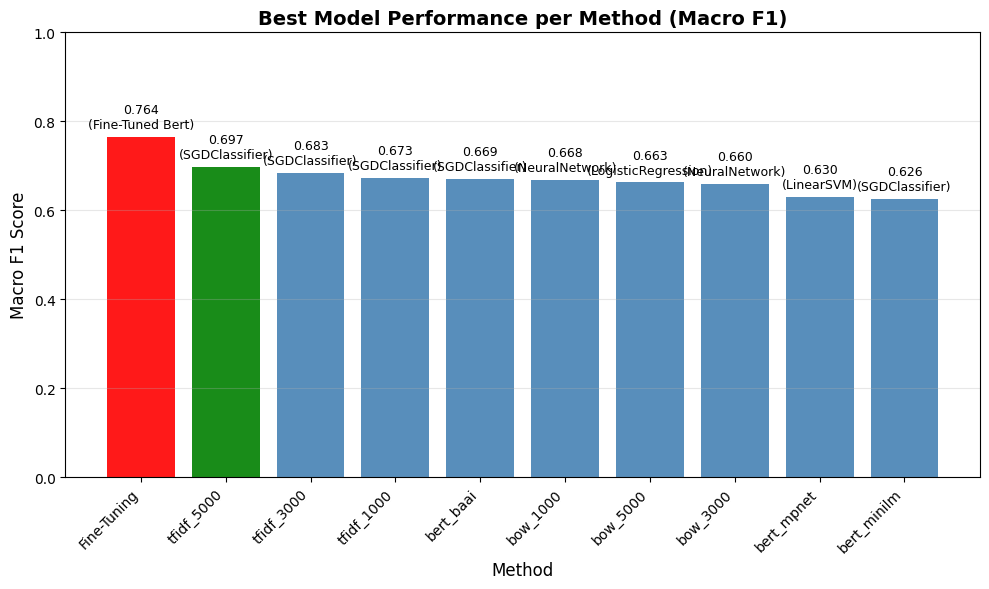

,method,model,macro_f1,micro_f1,per_label_f1,per_label_precision,per_label_recall,per_label_support,hamming_loss,conf_matrices
0,Fine-Tuning,Fine-Tuned Bert,0.764300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tfidf_5000,SGDClassifier,0.696879,0.715018,[0.73438956 0.66666667 0.76973684 0.61672474],[0.71766849 0.56696429 0.7027027 0.48760331],[0.7519084 0.8089172 0.85090909 0.83886256],[1048 157 275 211],0.102701,"[array([[1215, 310],\n [ 260, 788]]), ..."
2,tfidf_3000,SGDClassifier,0.682925,0.704000,[0.72559 0.63104326 0.77302632 0.60204082],[0.70440252 0.52542373 0.70570571 0.46949602],[0.7480916 0.78980892 0.85454545 0.83886256],[1048 157 275 211],0.107851,"[array([[1196, 329],\n [ 264, 784]]), ..."
3,tfidf_1000,SGDClassifier,0.672768,0.694742,[0.71909048 0.61870504 0.76143791 0.59183673],[0.71401693 0.49615385 0.69139466 0.46153846],[0.72423664 0.82165605 0.84727273 0.82464455],[1048 157 275 211],0.110571,"[array([[1221, 304],\n [ 289, 759]]), ..."
4,bert_baai,SGDClassifier,0.669317,0.707044,[0.75306315 0.59276018 0.73177843 0.59966499],[0.74394786 0.45964912 0.6107056 0.46373057],[0.76240458 0.8343949 0.91272727 0.84834123],[1048 157 275 211],0.109503,"[array([[1250, 275],\n [ 249, 799]]), ..."
5,bow_1000,NeuralNetwork,0.667707,0.670306,[0.66760563 0.64028777 0.71541502 0.64751958],[0.65711645 0.73553719 0.78354978 0.72093023],[0.67843511 0.56687898 0.65818182 0.58767773],[1048 157 275 211],0.105616,"[array([[1154, 371],\n [ 337, 711]]), ..."
6,bow_5000,LogisticRegression,0.662530,0.684789,[0.70527791 0.61662198 0.72516556 0.60305344],[0.69075938 0.53240741 0.6656535 0.50479233],[0.72041985 0.73248408 0.79636364 0.74881517],[1048 157 275 211],0.111543,"[array([[1187, 338],\n [ 293, 755]]), ..."
7,bow_3000,NeuralNetwork,0.659555,0.671061,[0.67858824 0.6366782 0.68173258 0.64122137],[0.66945218 0.6969697 0.70703125 0.69230769],[0.6879771 0.58598726 0.65818182 0.5971564 ],[1048 157 275 211],0.106685,"[array([[1169, 356],\n [ 327, 721]]), ..."
8,bert_mpnet,LinearSVM,0.629919,0.682446,[0.75673209 0.51764706 0.70231214 0.54298643],[0.72528434 0.37393768 0.58273381 0.39823009],[0.79103053 0.84076433 0.88363636 0.85308057],[1048 157 275 211],0.125146,"[array([[1211, 314],\n [ 219, 829]]), ..."
9,bert_minilm,SGDClassifier,0.626175,0.676471,[0.74943971 0.49162011 0.72698413 0.53665689],[0.70667794 0.34736842 0.64507042 0.38853503],[0.79770992 0.84076433 0.83272727 0.86729858],[1048 157 275 211],0.128255,"[array([[1178, 347],\n [ 212, 836]]), ..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_best_per_method_with_special(results_df):
    special_row = pd.DataFrame([{
        "method": "Fine-Tuning",
        "model": "Fine-Tuned Bert",
        "macro_f1": 0.7643   # hardcoded
    }])

    # Append to results
    results_df = pd.concat([special_row, results_df], ignore_index=True)

    best_per_method = results_df.loc[
        results_df.groupby("method")["macro_f1"].idxmax()
    ]

    special = best_per_method[best_per_method["method"] == "SPECIAL_METHOD"]
    normal  = best_per_method[best_per_method["method"] != "SPECIAL_METHOD"]

    # Sort normal ones by F1
    normal = normal.sort_values("macro_f1", ascending=False)

    # Special first, then sorted normal
    best_per_method = pd.concat([special, normal]).reset_index(drop=True)

    best_real_pos = 1

    methods = best_per_method["method"].tolist()
    macro_f1 = best_per_method["macro_f1"].tolist()
    models   = best_per_method["model"].tolist()

    # Initialize all colors blue
    colors = ["steelblue"] * len(methods)

    # Assign colors
    colors[0] = "red"    # special method first
    if len(colors) > 1:
        colors[best_real_pos] = "green"   # best real method

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(methods)), macro_f1, color=colors, alpha=0.9)

    plt.xlabel("Method", fontsize=12)
    plt.ylabel("Macro F1 Score", fontsize=12)
    plt.title("Best Model Performance per Method (Macro F1)", fontsize=14, fontweight="bold")
    plt.xticks(range(len(methods)), methods, rotation=45, ha="right")
    plt.ylim(0, 1.0)
    plt.grid(axis='y', alpha=0.3)

    # Labels above bars
    for i, (score, model) in enumerate(zip(macro_f1, models)):
        plt.text(i, score + 0.02, f'{score:.3f}\n({model})',
                 ha='center', fontsize=9)

    plt.tight_layout()
    plt.savefig("best_with_special.png", dpi=300, bbox_inches='tight')
    plt.show()

    return best_per_method

df = pd.read_csv("curr_results_2.csv")
plot_best_per_method_with_special(df)

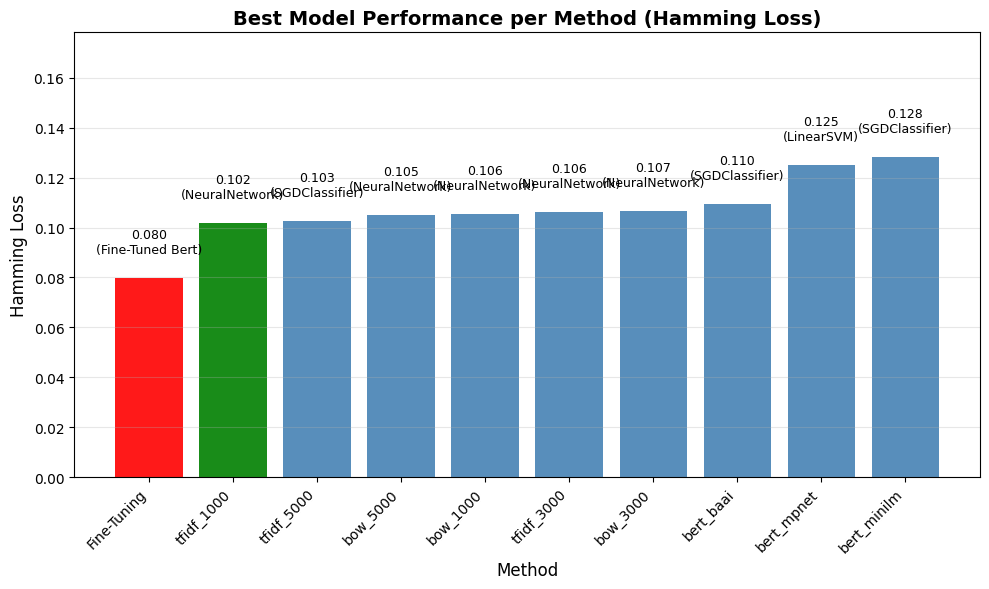

,method,model,hamming_loss,macro_f1,micro_f1,per_label_f1,per_label_precision,per_label_recall,per_label_support,conf_matrices
0,Fine-Tuning,Fine-Tuned Bert,0.079700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tfidf_1000,NeuralNetwork,0.102021,0.657371,0.676326,[0.68847795 0.64 0.69879518 0.60220994],[0.68426013 0.74576271 0.78026906 0.7218543 ],[0.69274809 0.56050955 0.63272727 0.51658768],[1048 157 275 211],"[array([[1190, 335],\n [ 322, 726]]), ..."
2,tfidf_5000,SGDClassifier,0.102701,0.696879,0.715018,[0.73438956 0.66666667 0.76973684 0.61672474],[0.71766849 0.56696429 0.7027027 0.48760331],[0.7519084 0.8089172 0.85090909 0.83886256],[1048 157 275 211],"[array([[1215, 310],\n [ 260, 788]]), ..."
3,bow_5000,NeuralNetwork,0.104936,0.646804,0.670531,[0.68762089 0.6119403 0.69056604 0.59708738],[0.69705882 0.73873874 0.71764706 0.6119403 ],[0.67843511 0.52229299 0.66545455 0.58293839],[1048 157 275 211],"[array([[1216, 309],\n [ 337, 711]]), ..."
4,bow_1000,NeuralNetwork,0.105616,0.667707,0.670306,[0.66760563 0.64028777 0.71541502 0.64751958],[0.65711645 0.73553719 0.78354978 0.72093023],[0.67843511 0.56687898 0.65818182 0.58767773],[1048 157 275 211],"[array([[1154, 371],\n [ 337, 711]]), ..."
5,tfidf_3000,NeuralNetwork,0.106199,0.638344,0.657044,[0.67260346 0.61486486 0.68100358 0.58490566],[0.7456446 0.65467626 0.67137809 0.58215962],[0.61259542 0.57961783 0.69090909 0.58767773],[1048 157 275 211],"[array([[1306, 219],\n [ 406, 642]]), ..."
6,bow_3000,NeuralNetwork,0.106685,0.659555,0.671061,[0.67858824 0.6366782 0.68173258 0.64122137],[0.66945218 0.6969697 0.70703125 0.69230769],[0.6879771 0.58598726 0.65818182 0.5971564 ],[1048 157 275 211],"[array([[1169, 356],\n [ 327, 721]]), ..."
7,bert_baai,SGDClassifier,0.109503,0.669317,0.707044,[0.75306315 0.59276018 0.73177843 0.59966499],[0.74394786 0.45964912 0.6107056 0.46373057],[0.76240458 0.8343949 0.91272727 0.84834123],[1048 157 275 211],"[array([[1250, 275],\n [ 249, 799]]), ..."
8,bert_mpnet,LinearSVM,0.125146,0.629919,0.682446,[0.75673209 0.51764706 0.70231214 0.54298643],[0.72528434 0.37393768 0.58273381 0.39823009],[0.79103053 0.84076433 0.88363636 0.85308057],[1048 157 275 211],"[array([[1211, 314],\n [ 219, 829]]), ..."
9,bert_minilm,SGDClassifier,0.128255,0.626175,0.676471,[0.74943971 0.49162011 0.72698413 0.53665689],[0.70667794 0.34736842 0.64507042 0.38853503],[0.79770992 0.84076433 0.83272727 0.86729858],[1048 157 275 211],"[array([[1178, 347],\n [ 212, 836]]), ..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_best_per_method_with_h(results_df):
    special_row = pd.DataFrame([{
        "method": "Fine-Tuning",
        "model": "Fine-Tuned Bert",
        "hamming_loss": 0.0797  # manual best loss
    }])

    # Append to main results
    results_df = pd.concat([special_row, results_df], ignore_index=True)

    best_per_method = results_df.loc[
        results_df.groupby("method")["hamming_loss"].idxmin()
    ]

    special = best_per_method[best_per_method["method"] == "SPECIAL_METHOD"]
    normal  = best_per_method[best_per_method["method"] != "SPECIAL_METHOD"]

    # Sort real methods from best (lowest) to worst
    normal = normal.sort_values("hamming_loss", ascending=True)

    # Special first, then the sorted normal list
    best_per_method = pd.concat([special, normal]).reset_index(drop=True)
    best_real_pos = 1 if len(best_per_method) > 1 else None

    methods = best_per_method["method"].tolist()
    hamming = best_per_method["hamming_loss"].tolist()
    models  = best_per_method["model"].tolist()

    # All bars default blue
    colors = ["steelblue"] * len(methods)

    colors[0] = "red"

    if best_real_pos is not None:
        colors[best_real_pos] = "green"

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(methods)), hamming, color=colors, alpha=0.9)

    # Labels and styling
    plt.xlabel("Method", fontsize=12)
    plt.ylabel("Hamming Loss", fontsize=12)
    plt.title("Best Model Performance per Method (Hamming Loss)",
              fontsize=14, fontweight="bold")

    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylim(0, max(hamming) + 0.05)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, (score, model) in enumerate(zip(hamming, models)):
        plt.text(i, score + 0.01, f"{score:.3f}\n({model})",
                 ha="center", fontsize=9)

    plt.tight_layout()
    plt.savefig("best_with_special_hamming.png", dpi=300, bbox_inches="tight")
    plt.show()

    return best_per_method

df = pd.read_csv("curr_results_2.csv")
plot_best_per_method_with_h(df)

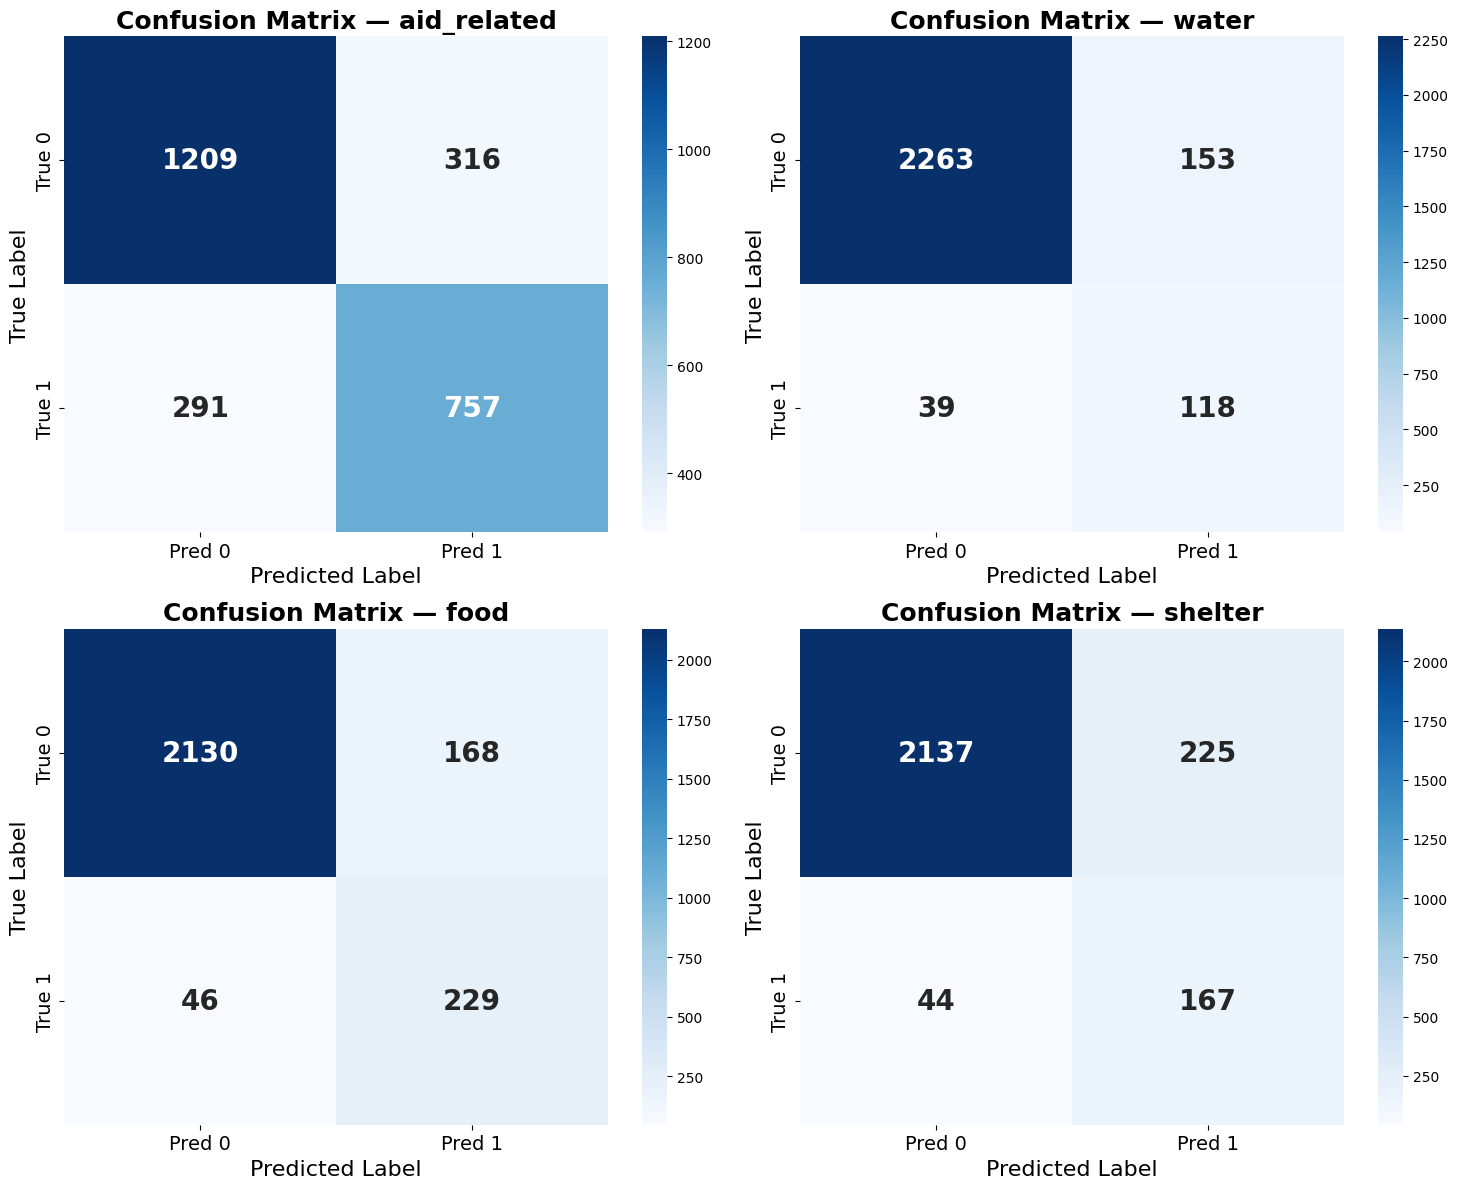

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Values from results.csv (Logisitc Regression on Count Vectorizer max features = 1000)
conf_matrices = [
    np.array([[1209, 316],
              [ 291, 757]]),
    np.array([[2263, 153],
              [  39, 118]]),
    np.array([[2130, 168],
              [  46, 229]]),
    np.array([[2137, 225],
              [  44, 167]])
]

label_names = ["aid_related", "water", "food", "shelter"]

plt.figure(figsize=(15, 12))

for i, cm in enumerate(conf_matrices):
    plt.subplot(2, 2, i + 1)
    ax = sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        annot_kws={"size": 20, "weight": "bold"},
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"]
    )

    plt.title(f"Confusion Matrix — {label_names[i]}", fontsize=18, weight="bold")
    plt.xlabel("Predicted Label", fontsize=16)
    plt.ylabel("True Label", fontsize=16)

    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()
